In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plk
%matplotlib inline
import os

In [37]:
transaction_data = pd.read_csv('/home/jupyter-t-varenichenko-22/My practice/Lesson 5/transaction_data.csv')

In [3]:
transaction_data.head(2)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull


In [4]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

Сколько наблюдений относятся к тому или иному уровню?

In [26]:
transaction_data['transaction'].value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

In [46]:
trans_success = transaction_data.query("transaction == 'successfull'") \
                                .groupby('name', as_index = False) \
                                .agg({'transaction':'count'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


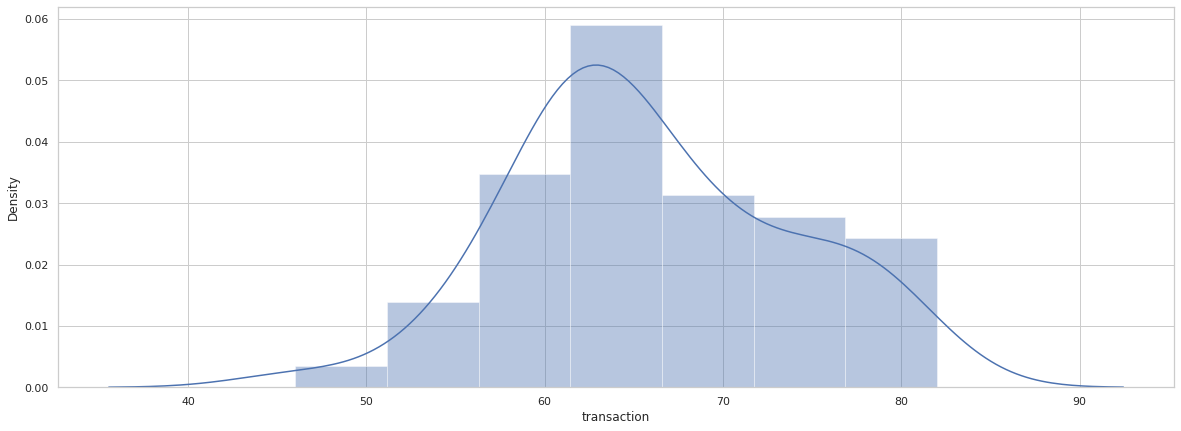

In [49]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
sns.distplot(trans_success.transaction)

In [62]:
trans_success.transaction.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: transaction, dtype: float64

In [115]:
df = pd.read_csv('/home/jupyter-t-varenichenko-22/My practice/Lesson 5/transaction_data_updated.csv')

In [87]:
df.head(7)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9
6,2020-03-02 00:54:12,Olga_Lesnova,successfull,54


In [86]:
user_vs_minute_pivot = df.groupby(['name','minute'] , as_index = False) \
        .agg({'transaction' : 'count'}) \
        .pivot(index = 'minute', columns = 'name', values = 'transaction') \
        .fillna(0)
user_vs_minute_pivot


name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [119]:
# посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).
df.date = pd.to_datetime(df.date)
df['true_minute'] = df['date'].dt.hour.mul(60) + df['date'].dt.minute

In [123]:
df['true_'] = df['true_minute'].value_counts()
sns.barplot(x='true_minute', y='transaction', data = df)

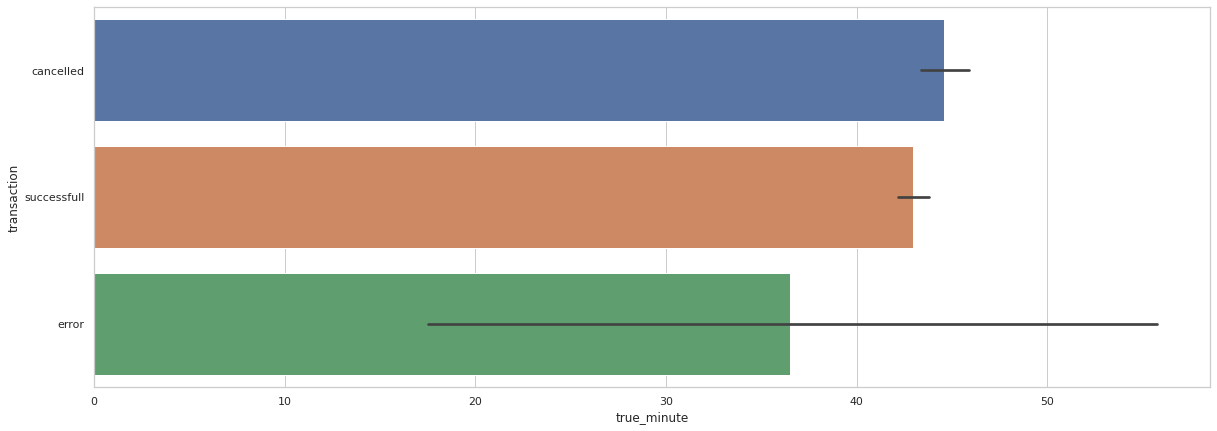